In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px

from sklearn.model_selection import train_test_split

import re
import string
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from wordcloud import WordCloud

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from tqdm.auto import tqdm

from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense,Dropout

In [3]:
df=pd.read_csv('../Deeplearning/Datasets/movie.csv')

In [4]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
def clean_text(text):
    text=str(text).lower()
    text=re.sub('\[.*?\]', '', text)
    text=re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>+', '', text)
    text=re.sub('[%s]' % re.escape(string.punctuation),'',text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [6]:
sws=stopwords.words('english')
lemma=WordNetLemmatizer()

def preprocessdata(text):
    text= ' '.join(word for word in text.split(' ') if word not in sws)
    text= ' '.join(lemma.lemmatize(word) for word in text.split(' '))
    return text

In [7]:
df['text']=df['text'].apply(clean_text)

In [8]:
df['text']=df['text'].apply(preprocessdata)

In [10]:
df.head()

,text,label
0,grew b watching loving thunderbird mate schoo...,0
1,put movie dvd player sat coke chip expectation...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movie bore...,0
4,im die hard dad army fan nothing ever change g...,1


In [11]:
df['text']=df['text'].apply(lambda x:' '.join(text for text in x.split(' ') if len(text)>2))

In [12]:
df.head()

,text,label
0,grew watching loving thunderbird mate school w...,0
1,put movie dvd player sat coke chip expectation...,0
2,people know particular time past like feel nee...,0
3,even though great interest biblical movie bore...,0
4,die hard dad army fan nothing ever change got ...,1


In [15]:
df['text'][0]

'grew watching loving thunderbird mate school watched played thunderbird school lunch school wanted virgil scott one wanted alan counting became art form took child see movie hoping would get glimpse loved child bitterly disappointing high point snappy theme tune could compare original score thunderbird thankfully early saturday morning one television channel still play rerun series gerry anderson wife created jonatha frakes hand director chair version completely hopeless waste film utter rubbish cgi remake may acceptable replacing marionette homo sapiens subsp sapiens huge error judgment'

In [22]:
from collections import OrderedDict
df['text']=(df['text'].str.split().apply(lambda x:OrderedDict.fromkeys(x).keys()).str.join(' '))

In [24]:
df['text'][1]

'put movie dvd player sat coke chip expectation hoping would contain strongpoints first awsome animation good flowing story excellent voice cast funny comedy kickass soundtrack disappointment found atlantis milo return read review might let following paragraph directed seen enjoyed primarily point mentionedwhen scene appears shock picked displaycase local videoshop whatever music feel bad imitation replaced fitting one exception character like sweet actual drawing isnt particular sad sight storyline also pretty weak three episode schoobydoo single adventurous got last time dont misunderstand didnt laugh although sniggered twiceto audience havent especially care similar sequel fast standalone product liked could still enjoy nothing else suspect kid wouldnt know better threeepisode series cartoon channel breakfast'

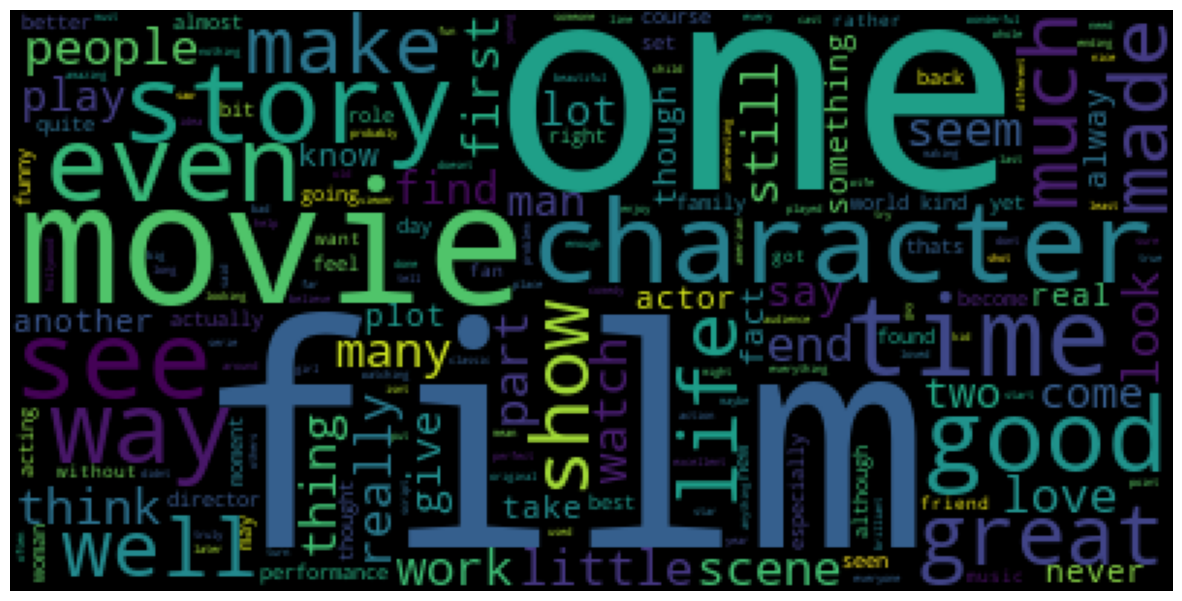

In [25]:
plt.figure(figsize=(15,10))
wc=WordCloud(max_words=500,background_color='black')
wc.generate(' '.join(word for word in df.loc[df['label']==1,'text']))
plt.imshow(wc)
plt.axis('off')
plt.show()

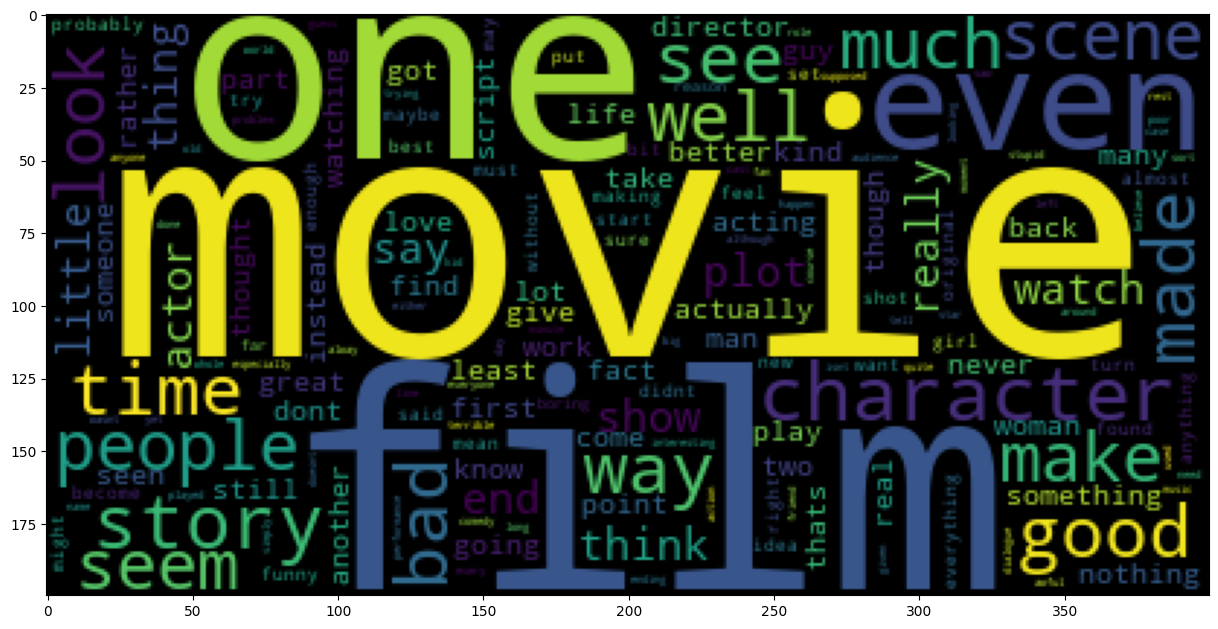

In [26]:
plt.figure(figsize=(15,10))
wc=WordCloud(max_words=500,background_color='black')
wc.generate(' '.join(word for word in df.loc[df['label']==0,'text']))
plt.imshow(wc)
plt.show()

In [27]:
X=df['text']
Y=df['label']

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [29]:
def test_pipeline(model):
    pip=Pipeline([('bow',CountVectorizer()),('tfidf',TfidfTransformer()),('model',model)])
    pip.fit(X_train,Y_train)
    y_pred=pip.predict(X_test)
    print('Accuracy : ',accuracy_score(Y_test,y_pred))
    print(classification_report(Y_test,y_pred))

In [30]:
test_pipeline(MultinomialNB())

Accuracy :  0.857375
              precision    recall  f1-score   support

           0       0.85      0.87      0.86      4023
           1       0.87      0.84      0.85      3977

    accuracy                           0.86      8000
   macro avg       0.86      0.86      0.86      8000
weighted avg       0.86      0.86      0.86      8000



In [31]:
test_pipeline(BernoulliNB())

Accuracy :  0.845
              precision    recall  f1-score   support

           0       0.82      0.89      0.85      4023
           1       0.87      0.80      0.84      3977

    accuracy                           0.84      8000
   macro avg       0.85      0.84      0.84      8000
weighted avg       0.85      0.84      0.84      8000



In [32]:
test_pipeline(RandomForestClassifier())

Accuracy :  0.845375
              precision    recall  f1-score   support

           0       0.84      0.85      0.85      4023
           1       0.85      0.84      0.84      3977

    accuracy                           0.85      8000
   macro avg       0.85      0.85      0.85      8000
weighted avg       0.85      0.85      0.85      8000



In [33]:
test_pipeline(GradientBoostingClassifier())

Accuracy :  0.80225
              precision    recall  f1-score   support

           0       0.85      0.74      0.79      4023
           1       0.77      0.86      0.81      3977

    accuracy                           0.80      8000
   macro avg       0.81      0.80      0.80      8000
weighted avg       0.81      0.80      0.80      8000



In [34]:
test_pipeline(XGBClassifier())